# Chapter 2 - Flows on the Line

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root as sp_root

from utils.solvers import FirstOrderDiffEqn
from utils.solvers.firstorder import num_sol_runge_kutta,num_sol_euler
from utils.plot.utils import draw_circle, draw_arrow

plt.rcParams["figure.figsize"] = (20, 5)

def saveFig(filename, chapter):
  plt.savefig(f"plots/chapter{chapter}/{filename}.png", facecolor="w")

## Flows

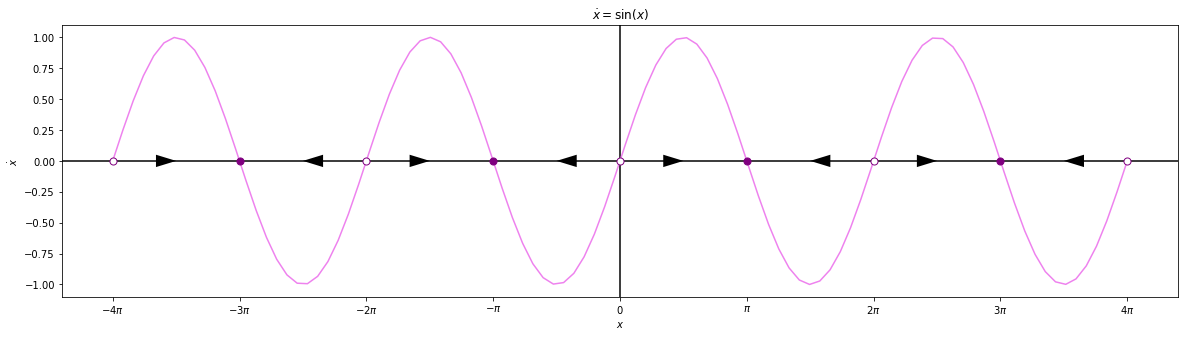

In [2]:
x = np.linspace(-4 * np.pi, 4 * np.pi, 100)
x_dot = np.sin(x)

plt.plot(x, x_dot, color='violet')

plt.axhline(color="black", zorder=-1)
plt.axvline(color="black", zorder=-1)
plt.ylabel("$\dot{x}$")
plt.xlabel("$x$")
plt.title("$\dot{x} = \sin(x)$")
plt.xticks(np.linspace(-4 * np.pi, 4 * np.pi, 9), labels=["$-4\pi$", "$-3\pi$", "$-2\pi$", "$-\pi$", "$0$", "$\pi$", "$2\pi$", "$3\pi$", "$4\pi$"])

# Arrow heads
for x in np.linspace(-3.5 * np.pi, 3.5 * np.pi, 8):
  direction = 1 if np.sin(x) > 0 else -1
  plt.arrow(x - 0.5 * direction, 0, 0.001 * direction, 0, head_width=0.1, head_length=0.5, edgecolor='None', facecolor='black')

# Dots
plt.scatter(np.linspace(-4 * np.pi, 4 * np.pi, 5), np.zeros((5, )), s=50, c='white', edgecolors='purple', zorder=10)
plt.scatter(np.linspace(-3 * np.pi, 3 * np.pi, 4), np.zeros((4, )), s=50, c='purple', zorder=10)

plt.show()

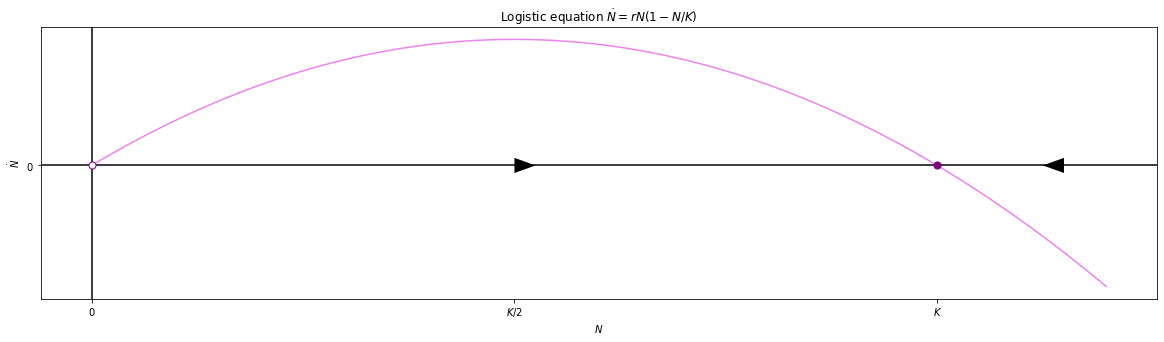

In [3]:
K = 100
r = 1
n = np.linspace(0, K * 1.2, 150)
n_dot = n * r * (1 - n / K)

plt.plot(n, n_dot, color='violet')

plt.axhline(color="black", zorder=-1)
plt.axvline(color="black", zorder=-1)
plt.ylabel("$\dot{N}$")
plt.xlabel("$N$")
plt.title("Logistic equation $\dot{N} = rN (1 - N/K)$")
plt.xticks([0, K/2, K], ["$0$", "$K/2$", "$K$"])
plt.yticks([0], ["$0$"])

plt.scatter([0], [0], s=50, c='white', edgecolor='purple', zorder=10)
plt.scatter([K], [0], s=50, c='purple', zorder=10)
plt.arrow(K/2, 0, 0.001, 0, head_width=3, head_length=2.5, edgecolor='None', facecolor='black')
plt.arrow(K * 1.15, 0, -0.001, 0, head_width=3, head_length=2.5, edgecolor='None', facecolor='black')

plt.show()

## Numerical Solutions

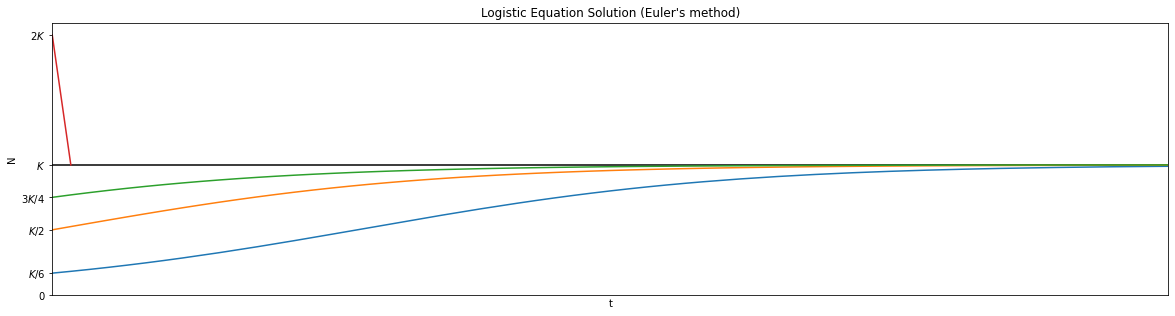

In [4]:
K = 100
r = 1
logistic_fn: FirstOrderDiffEqn = lambda n: n * r * (1 - n / K)

t1, N1 = num_sol_euler(logistic_fn, K/6)
t2, N2 = num_sol_euler(logistic_fn, K/2)
t3, N3 = num_sol_euler(logistic_fn, 3*K/4)
t4, N4 = num_sol_euler(logistic_fn, 2*K)

plt.plot(t1, N1, t2, N2, t3, N3, t4, N4)
plt.xlim(0, 6)
plt.axhline(100, color='black', zorder=-100)
plt.xlabel("t")
plt.xticks([])
plt.ylabel("N")
plt.yticks([0, K/6, K/2, 3 * K/4, K, 2 * K], ["$0$", "$K/6$", "$K/2$", "$3K/4$", "$K$", "$2K$"])
plt.title("Logistic Equation Solution (Euler's method)")

plt.show()

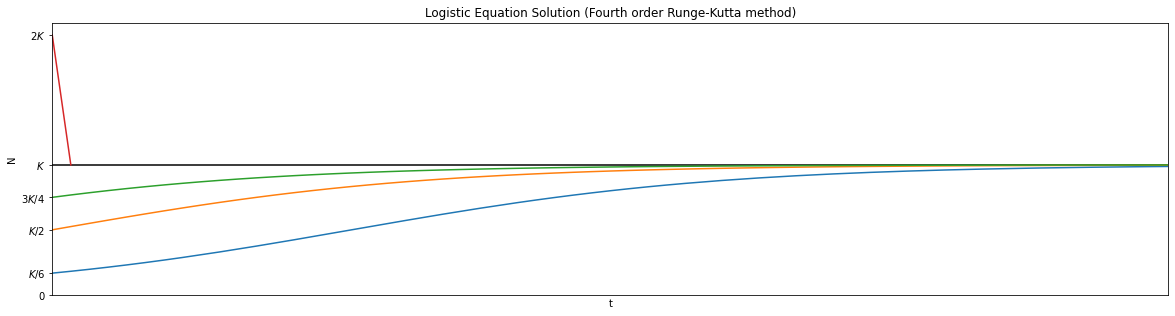

In [5]:
K = 100
r = 1
logistic_fn: FirstOrderDiffEqn = lambda n: n * r * (1 - n / K)

t1, N1 = num_sol_runge_kutta(logistic_fn, K/6)
t2, N2 = num_sol_runge_kutta(logistic_fn, K/2)
t3, N3 = num_sol_runge_kutta(logistic_fn, 3*K/4)
t4, N4 = num_sol_runge_kutta(logistic_fn, 2*K)

plt.plot(t1, N1, t2, N2, t3, N3, t4, N4)
plt.xlim(0, 6)
plt.axhline(100, color='black', zorder=-100)
plt.xlabel("t")
plt.xticks([])
plt.ylabel("N")
plt.yticks([0, K/6, K/2, 3 * K/4, K, 2 * K], ["$0$", "$K/6$", "$K/2$", "$3K/4$", "$K$", "$2K$"])
plt.title("Logistic Equation Solution (Fourth order Runge-Kutta method)")

plt.show()

# Chapter 3 - Bifurcations

## Saddle-Node Bifurcation

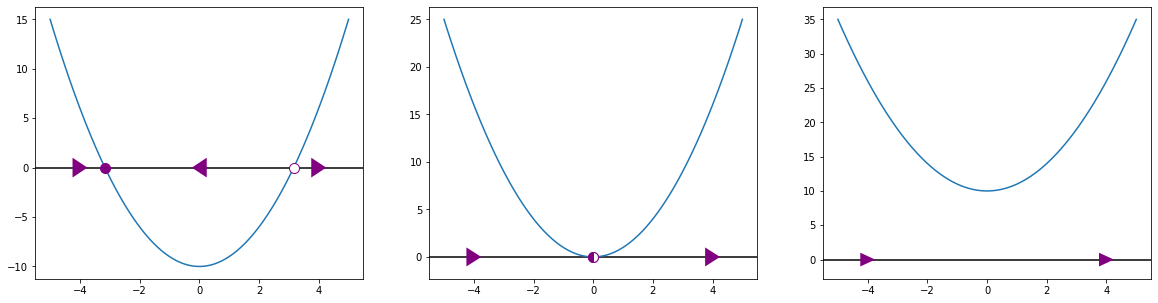

In [6]:
x = np.linspace(-5, 5, 100)
quadratic = lambda x, r: x ** 2 + r

for idx, r in enumerate([-10, -1e-10, 10], start=1):
  plt.subplot(1, 3, idx)
  plt.plot(x, quadratic(x, r))
  roots = sp_root(lambda x: quadratic(x, r), [-2, 2])
  if roots.success:
    for root in roots.x:
      if root < -1:
        draw_circle([root, 0], radius=10, type='full')
      elif root > 1:
        draw_circle([root, 0], radius=10, type='empty')
      else:
        draw_circle([root, 0], radius=10, type='left')
  plt.axhline(color='black', zorder=-100)

plt.subplot(1, 3, 1)
draw_arrow([-4, 0], 'right', head_width=2, head_length=0.5, zorder=100)
draw_arrow([0, 0], 'left', head_width=2, head_length=0.5, zorder=100)
draw_arrow([4, 0], 'right', head_width=2, head_length=0.5, zorder=100)

plt.subplot(1, 3, 2)
draw_arrow([-4, 0], 'right', head_width=2, head_length=0.5, zorder=100)
draw_arrow([4, 0], 'right', head_width=2, head_length=0.5, zorder=100)

plt.subplot(1, 3, 3)
draw_arrow([-4, 0], 'right', head_width=2, head_length=0.5, zorder=100)
draw_arrow([4, 0], 'right', head_width=2, head_length=0.5, zorder=100)

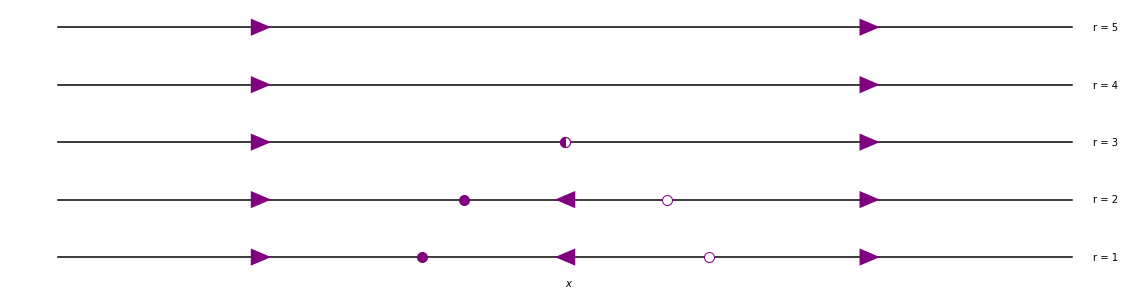

In [7]:
for idx, r in enumerate(np.linspace(-2, 2, 5), start=1):
  plt.plot([-5, 5], [idx, idx], color='black')
  roots = sp_root(lambda x: quadratic(x, r - 1e-10), [-2, 2])
  if roots.success:
    for root in roots.x:
      if root < -1:
        draw_circle([root, idx], radius=10, type='full')
      elif root > 1:
        draw_circle([root, idx], radius=10, type='empty')
      else:
        draw_circle([root, idx], radius=10, type='left')
  plt.text(5.2, idx - 0.05, "r = " + str(idx))

draw_arrow([-3, 1], 'right', head_width=0.3, head_length=0.2, zorder=100)
draw_arrow([0, 1], 'left', head_width=0.3, head_length=0.2, zorder=100)
draw_arrow([3, 1], 'right', head_width=0.3, head_length=0.2, zorder=100)

draw_arrow([-3, 2], 'right', head_width=0.3, head_length=0.2, zorder=100)
draw_arrow([0, 2], 'left', head_width=0.3, head_length=0.2, zorder=100)
draw_arrow([3, 2], 'right', head_width=0.3, head_length=0.2, zorder=100)

draw_arrow([-3, 3], 'right', head_width=0.3, head_length=0.2, zorder=100)
draw_arrow([3, 3], 'right', head_width=0.3, head_length=0.2, zorder=100)

draw_arrow([-3, 4], 'right', head_width=0.3, head_length=0.2, zorder=100)
draw_arrow([3, 4], 'right', head_width=0.3, head_length=0.2, zorder=100)

draw_arrow([-3, 5], 'right', head_width=0.3, head_length=0.2, zorder=100)
draw_arrow([3, 5], 'right', head_width=0.3, head_length=0.2, zorder=100)

plt.axis("off")
plt.text(0, 0.5, "$x$")

plt.show()

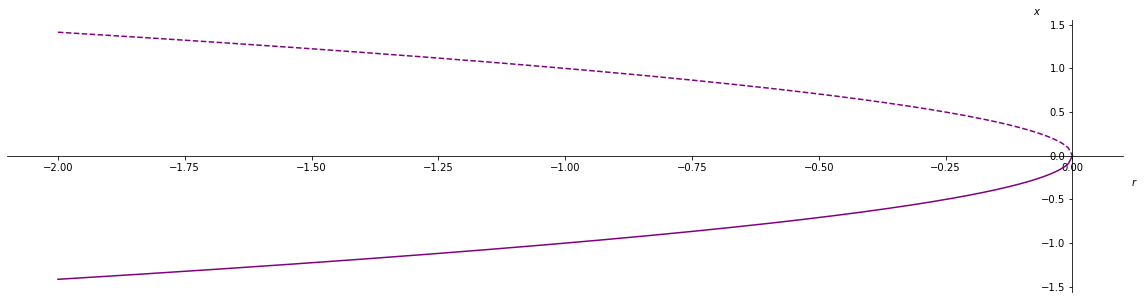

In [8]:
fixed_points = np.full([2, 2, 501], None)

for idx, r in enumerate(np.linspace(-2, 2, 501)):
  roots = sp_root(lambda x: quadratic(x, r - 1e-10), [-2, 2])

  if roots.success:
    fixed_points[0][0][idx] = r
    fixed_points[0][1][idx] = roots.x[0]
    fixed_points[1][0][idx] = r
    fixed_points[1][1][idx] = roots.x[1]

plt.plot(fixed_points[0][0], fixed_points[0][1], color='purple')
plt.plot(fixed_points[1][0], fixed_points[1][1], color='purple', ls="--")

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")

plt.xlabel("$r$", x=1.01)
plt.ylabel("$x$", rotation=0, y=1.01)

plt.show()

## Transcritical Bifurcation

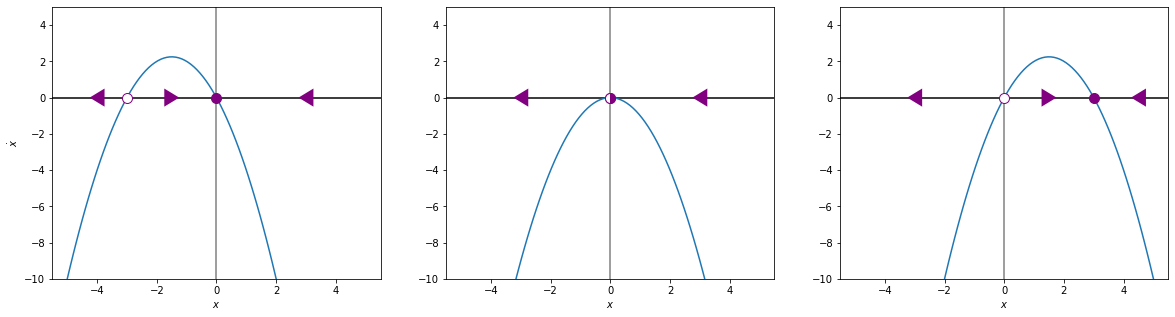

In [9]:
x = np.linspace(-5, 5, 100)
transcritical_fn = lambda x, r: x * r - x ** 2

for idx, r in enumerate([-3, -1e-10, 3], start=1):
  plt.subplot(1, 3, idx)
  plt.plot(x, transcritical_fn(x, r))
  roots = sp_root(lambda x: transcritical_fn(x, r), [-4, 4])
  if roots.success:
    for root in roots.x:
      if root < -1:
        draw_circle([root, 0], radius=10, type='empty')
      elif root > 1:
        draw_circle([root, 0], radius=10, type='full')
      else:
        draw_circle([root, 0], radius=10, type='full' if idx == 1 else 'right' if idx == 2 else 'empty')
  plt.axhline(color='black', zorder=-100)

plt.subplot(1, 3, 1)
draw_arrow([-4, 0], 'left', head_width=1, head_length=0.5, zorder=100)
draw_arrow([-1.5, 0], 'right', head_width=1, head_length=0.5, zorder=100)
draw_arrow([3, 0], 'left', head_width=1, head_length=0.5, zorder=100)
plt.ylim([-10, 5])
plt.ylabel("$\dot{x}$")
plt.xlabel("$x$")
plt.axvline(color='grey', zorder=-100)

plt.subplot(1, 3, 2)
draw_arrow([-3, 0], 'left', head_width=1, head_length=0.5, zorder=100)
draw_arrow([3, 0], 'left', head_width=1, head_length=0.5, zorder=100)
plt.ylim([-10, 5])
plt.xlabel("$x$")
plt.axvline(color='grey', zorder=-100)

plt.subplot(1, 3, 3)
draw_arrow([-3, 0], 'left', head_width=1, head_length=0.5, zorder=100)
draw_arrow([1.5, 0], 'right', head_width=1, head_length=0.5, zorder=100)
draw_arrow([4.5, 0], 'left', head_width=1, head_length=0.5, zorder=100)
plt.ylim([-10, 5])
plt.xlabel("$x$")
plt.axvline(color='grey', zorder=-100)

plt.show()

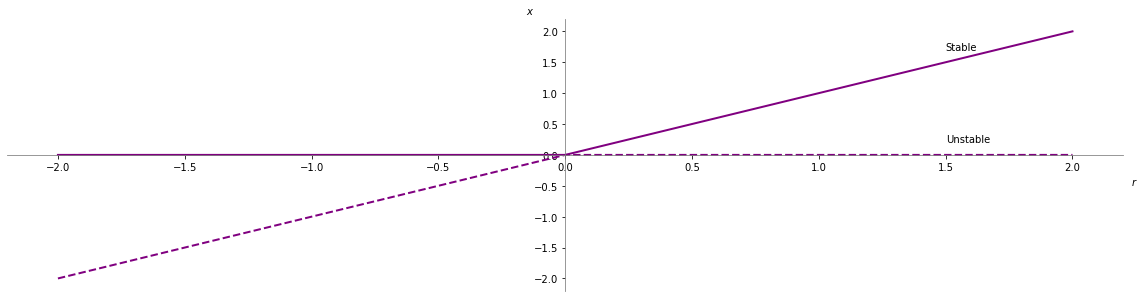

In [10]:
fixed_points = np.full([2, 2, 501], None)

for idx, r in enumerate(np.linspace(-2, 2, 501)):
  roots = sp_root(lambda x: transcritical_fn(x, r - 1e-10), [-2, 2])

  if roots.success:
    fixed_points[0][0][idx] = r
    fixed_points[0][1][idx] = roots.x[0]
    fixed_points[1][0][idx] = r
    fixed_points[1][1][idx] = roots.x[1]

plt.plot(fixed_points[0][0], fixed_points[0][1], color='purple', ls="--", lw=2)
plt.plot(fixed_points[1][0], fixed_points[1][1], color='purple', lw=2)

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.gca().spines["left"].set_color("grey")
plt.gca().spines["bottom"].set_color("grey")

plt.text(1.5, 0.2, "Unstable")
plt.text(1.5, 1.7, "Stable")

plt.xlabel("$r$", x=1.01)
plt.ylabel("$x$", rotation=0, y=1.01)

plt.show()

## Laser

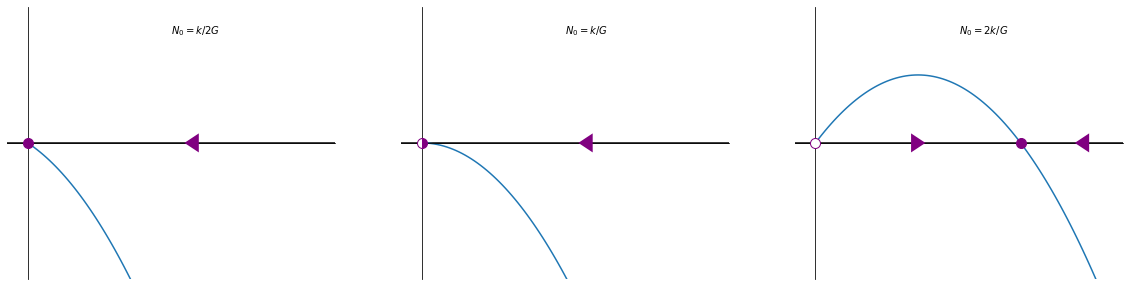

In [11]:
G = 1
alpha = 1
k = 1
laser_fn = lambda n, N_0: (G * N_0 - k) * n - G * alpha * n ** 2

for idx, N_0 in enumerate([k/(2 * G), k / G, 2 * k / G], start=1):
  n = np.linspace(0, 1.5, 100)
  n_dot = laser_fn(n, N_0)

  plt.subplot(1, 3, idx)
  plt.plot(n, n_dot)
  plt.axhline(color='black', zorder=-100)
  plt.ylim([-0.5, 0.5])
  plt.xlim([-0.1, 1.5])
  plt.gca().spines["left"].set_position("zero")
  plt.gca().spines["bottom"].set_position("zero")
  plt.gca().spines["right"].set_color("none")
  plt.gca().spines["top"].set_color("none")
  plt.xticks([])
  plt.yticks([])

plt.subplot(1, 3, 1)
draw_circle([0, 0], radius=10, type='full', zorder=100)
draw_arrow([0.8, 0], direction='left', head_width=0.07, head_length=0.07, zorder=100)
plt.text(0.7, 0.4, "$N_0 = k/2G$")

plt.subplot(1, 3, 2)
draw_circle([0, 0], radius=10, type='right', zorder=100)
draw_arrow([0.8, 0], direction='left', head_width=0.07, head_length=0.07, zorder=100)
plt.text(0.7, 0.4, "$N_0 = k/G$")

plt.subplot(1, 3, 3)
draw_circle([0, 0], radius=10, type='empty', zorder=100)
draw_circle([1, 0], radius=10, type='full', zorder=100)
draw_arrow([0.5, 0], direction='right', head_width=0.07, head_length=0.07, zorder=100)
draw_arrow([1.3, 0], direction='left', head_width=0.07, head_length=0.07, zorder=100)
plt.text(0.7, 0.4, "$N_0 = 2k/G$")

plt.show()

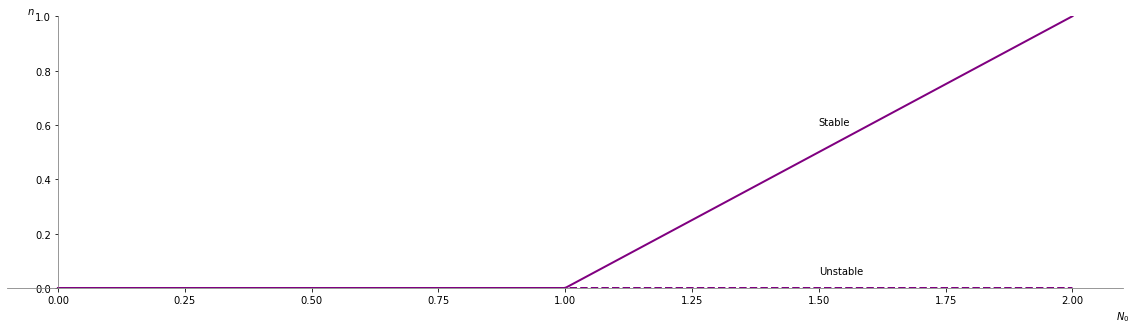

In [12]:
fixed_points = np.full([2, 2, 500], None)

for idx, N_0 in enumerate(np.linspace(0, 2*k/G, 500)):
  roots = sp_root(lambda n: laser_fn(n, N_0 - 1e-10), [-2, 2])

  if roots.success:
    fixed_points[0][0][idx] = N_0
    fixed_points[0][1][idx] = roots.x[0]
    fixed_points[1][0][idx] = N_0
    fixed_points[1][1][idx] = roots.x[1]

plt.plot(fixed_points[0][0], fixed_points[0][1], color='purple', ls="--", lw=2)
plt.plot(fixed_points[1][0], fixed_points[1][1], color='purple', lw=2)

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.gca().spines["left"].set_color("grey")
plt.gca().spines["bottom"].set_color("grey")

plt.text(1.5, 0.05, "Unstable")
plt.text(1.5, 0.6, "Stable")

plt.xlabel("$N_0$", x=1)
plt.ylabel("$n$", rotation=0, y=1)
plt.ylim([0, 1])

plt.show()

## Pitchfork Bifurcation

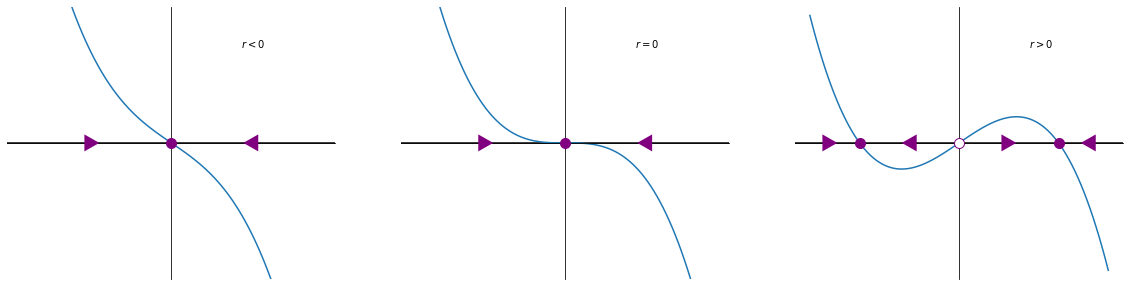

In [13]:
pitchfork_fn = lambda x, k: k * x - x ** 3

for idx, k in enumerate([-1, 0, 1], start=1):
  x = np.linspace(-1.5, 1.5, 100)
  x_dot = pitchfork_fn(x, k)

  plt.subplot(1, 3, idx)
  plt.plot(x, x_dot)
  plt.axhline(color='black', zorder=-100)
  plt.gca().spines["left"].set_position("zero")
  plt.gca().spines["bottom"].set_position("zero")
  plt.gca().spines["right"].set_color("none")
  plt.gca().spines["top"].set_color("none")
  plt.ylim([-2, 2])
  plt.xticks([])
  plt.yticks([])

plt.subplot(1, 3, 1)
draw_circle([0, 0], radius=10, type='full', zorder=100)
draw_arrow([0.8, 0], direction='left', head_width=0.25, head_length=0.15, zorder=100)
draw_arrow([-0.8, 0], direction='right', head_width=0.25, head_length=0.15, zorder=100)
plt.text(0.7, 1.4, "$r < 0$")

plt.subplot(1, 3, 2)
draw_circle([0, 0], radius=10, type='full', zorder=100)
draw_arrow([0.8, 0], direction='left', head_width=0.25, head_length=0.15, zorder=100)
draw_arrow([-0.8, 0], direction='right', head_width=0.25, head_length=0.15, zorder=100)
plt.text(0.7, 1.4, "$r = 0$")

plt.subplot(1, 3, 3)
draw_circle([0, 0], radius=10, type='empty', zorder=100)
draw_circle([1, 0], radius=10, type='full', zorder=100)
draw_circle([-1, 0], radius=10, type='full', zorder=100)
draw_arrow([0.5, 0], direction='right', head_width=0.25, head_length=0.15, zorder=100)
draw_arrow([1.3, 0], direction='left', head_width=0.25, head_length=0.15, zorder=100)
draw_arrow([-0.5, 0], direction='left', head_width=0.25, head_length=0.15, zorder=100)
draw_arrow([-1.3, 0], direction='right', head_width=0.25, head_length=0.15, zorder=100)
plt.text(0.7, 1.4, "$r > 0$")

plt.show()

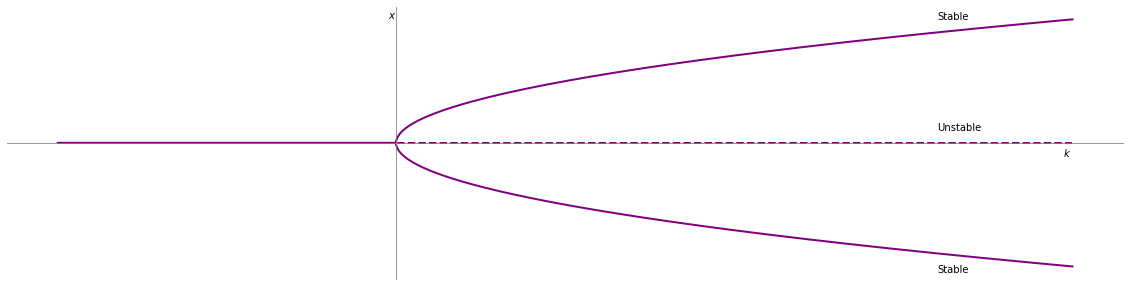

In [14]:
fixed_points = np.full([3, 2, 500], None)

for idx, k in enumerate(np.linspace(-0.5, 1, 500)):
  roots = sp_root(lambda x: pitchfork_fn(x, k - 1e-10), [-1, 0, 1])

  if roots.success:
    fixed_points[0][0][idx] = k
    fixed_points[0][1][idx] = roots.x[0]
    fixed_points[1][0][idx] = k
    fixed_points[1][1][idx] = roots.x[1]
    fixed_points[2][0][idx] = k
    fixed_points[2][1][idx] = roots.x[2]

plt.plot(fixed_points[0][0], fixed_points[0][1], color='purple', lw=2)
plt.plot(fixed_points[1][0], fixed_points[1][1], color='purple', ls="--", lw=2)
plt.plot(fixed_points[2][0], fixed_points[2][1], color='purple', lw=2)

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.gca().spines["left"].set_color("grey")
plt.gca().spines["bottom"].set_color("grey")

plt.text(0.8, 0.1, "Unstable")
plt.text(0.8, 1.0, "Stable")
plt.text(0.8, -1.05, "Stable")

plt.xlabel("$k$", x=0.95)
plt.ylabel("$x$", rotation=0, y=0.95)
plt.xticks([])
plt.yticks([])

plt.show()

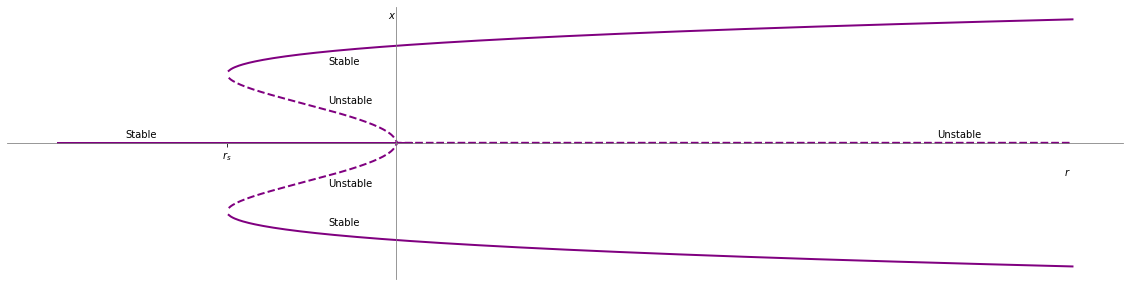

In [15]:
subcrit_pitchfork_fn = lambda x, k: k * x + x ** 3 - x ** 5
fixed_points = np.full([5, 2, 500], None)

for idx, k in enumerate(np.linspace(-0.5, 1, 500)):
  roots = sp_root(lambda x: subcrit_pitchfork_fn(x, k - 1e-10), [-2, -0.5, 0, 0.5, 2])

  if roots.success:
    fixed_points[0][0][idx] = k
    fixed_points[0][1][idx] = roots.x[0]
    fixed_points[1][0][idx] = k
    fixed_points[1][1][idx] = roots.x[1]
    fixed_points[2][0][idx] = k
    fixed_points[2][1][idx] = roots.x[2]
    fixed_points[3][0][idx] = k
    fixed_points[3][1][idx] = roots.x[3]
    fixed_points[4][0][idx] = k
    fixed_points[4][1][idx] = roots.x[4]
  else:
    fixed_points[2][0][idx] = k
    fixed_points[2][1][idx] = 0

plt.plot(fixed_points[0][0][80:], fixed_points[0][1][80:], color='purple', lw=2)
plt.plot(fixed_points[1][0][80:], fixed_points[1][1][80:], color='purple', ls="--", lw=2)
plt.plot(fixed_points[2][0][:175], fixed_points[2][1][:175], color='purple', lw=2)
plt.plot(fixed_points[3][0][80:], fixed_points[3][1][80:], color='purple', ls="--", lw=2)
plt.plot(fixed_points[4][0][80:], fixed_points[4][1][80:], color='purple', lw=2)

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.gca().spines["left"].set_color("grey")
plt.gca().spines["bottom"].set_color("grey")

plt.text(-0.4, 0.05, "Stable")
plt.text(0.8, 0.05, "Unstable")
plt.text(-0.1, 0.4, "Unstable")
plt.text(-0.1, -0.45, "Unstable")
plt.text(-0.1, 0.8, "Stable")
plt.text(-0.1, -0.85, "Stable")

plt.xlabel("$r$", x=0.95)
plt.ylabel("$x$", rotation=0, y=0.95)
plt.xticks([-0.25], ["$r_s$"])
plt.yticks([])

plt.show()

### Imperfect supercritical pitchfork bifurcation

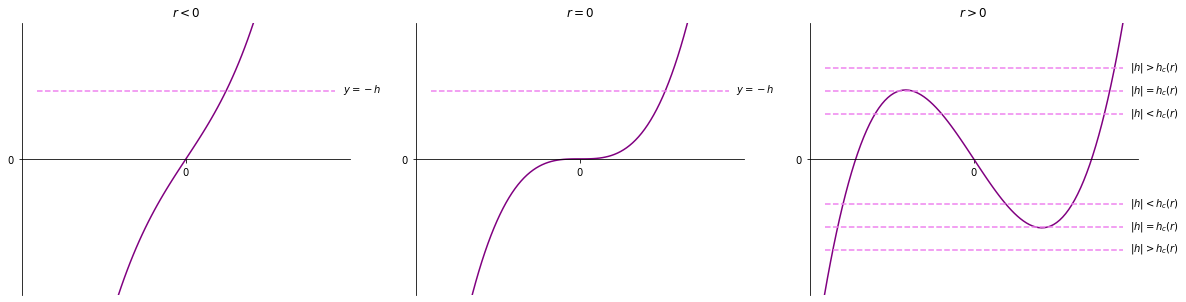

In [16]:
h = 1.5
k = 1
imperfect_pitchfork_fn = lambda x, k: h + k * x - x ** 3

x = np.linspace(-2, 2, 100)
for idx, r in enumerate([-2.5, 0, 2.5], start=1):
  plt.subplot(1, 3, idx)
  plt.title("$r" + ("< 0" if r < 0 else "= 0" if r == 0 else "> 0") + "$")
  plt.plot(x, x**3 - r * x, color="purple")

  if idx < 3:
    plt.plot(x, h * np.ones_like(x), color="violet", ls="--")
    plt.text(2.1, h - 0.05, "$y=-h$")


  plt.ylim([-3, 3])
  plt.gca().spines["bottom"].set_position("zero")
  plt.gca().spines["top"].set_color("none")
  plt.gca().spines["right"].set_color("none")
  plt.xticks([0], ["$0$"])
  plt.yticks([0], ["$0$"])

plt.subplot(1, 3, 3)
for h in [1, 1.5, 2]:
  for sign in [1, -1]:
    plt.plot(x, sign * h * np.ones_like(x), color="violet", ls="--")
    plt.text(2.1, sign * h - 0.05, "$|h|" + ("<" if h < 1.5 else ">" if h > 1.5 else "=") + "h_c(r)$")

saveFig(filename="imperfect_pitchfork", chapter=3)

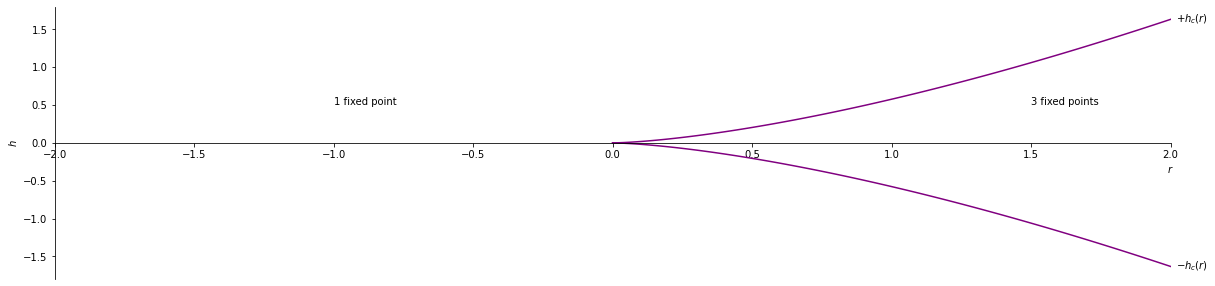

In [17]:
r = np.linspace(0, 2, 100)
h_c = (r ** 1.5) / np.sqrt(3)
plt.plot(r, h_c, r, -h_c, color="purple")
plt.xlabel("$r$", x=1)
plt.ylabel("$h$")
plt.text(2.02, 1.6, "$+h_c(r)$")
plt.text(2.02, -1.67, "$-h_c(r)$")
plt.xlim([-2, 2])

plt.text(-1, 0.5, "1 fixed point")
plt.text(1.5, 0.5, "3 fixed points")

plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.gca().spines["bottom"].set_position("zero")

saveFig("imperfect_pitchfork_stability", 3)

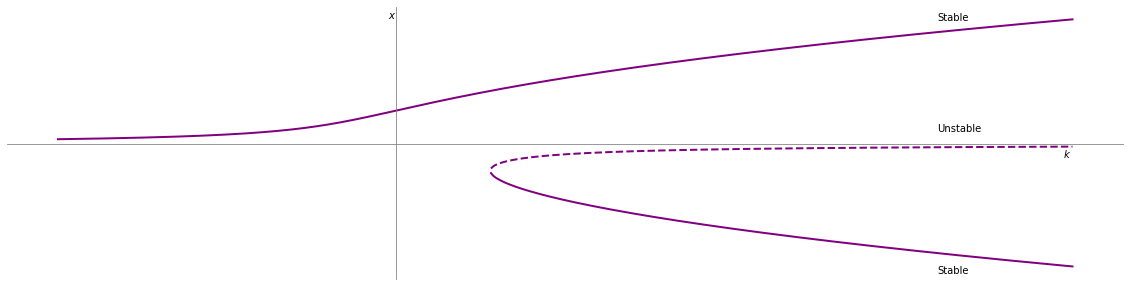

In [18]:
h = 0.02
fixed_points = np.full([3, 2, 500], None)

for idx, k in enumerate(np.linspace(-0.5, 1, 500)):
  roots = sp_root(lambda x: imperfect_pitchfork_fn(x, k - 1e-10), [1])
  roots_bifurc = sp_root(lambda x: imperfect_pitchfork_fn(x, k - 1e-10), [0, -1])

  fixed_points[0][0][idx] = k
  fixed_points[0][1][idx] = roots.x[0]
  if roots_bifurc.success:
    fixed_points[1][0][idx] = k
    fixed_points[1][1][idx] = roots_bifurc.x[0]
    fixed_points[2][0][idx] = k
    fixed_points[2][1][idx] = roots_bifurc.x[1]

plt.plot(fixed_points[0][0], fixed_points[0][1], color='purple', lw=2)
plt.plot(fixed_points[1][0][210:], fixed_points[1][1][210:], color='purple', ls="--", lw=2)
plt.plot(fixed_points[2][0][210:], fixed_points[2][1][210:], color='purple', lw=2)

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.gca().spines["left"].set_color("grey")
plt.gca().spines["bottom"].set_color("grey")

plt.text(0.8, 0.1, "Unstable")
plt.text(0.8, 1.0, "Stable")
plt.text(0.8, -1.05, "Stable")

plt.xlabel("$k$", x=0.95)
plt.ylabel("$x$", rotation=0, y=0.95)
plt.xticks([])
plt.yticks([])

saveFig("imperfect_pitchfork_bifurc", 3)